In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data

## Read Data

In [79]:
df = pd.read_csv("D:\Projects\Machinelearning\learning-ml\data\zomato\zomato.csv")

In [80]:
df.head()

,Name,URL,Cuisines,Area,Timing,Full_Address,PhoneNumber,IsHomeDelivery,isTakeaway,isIndoorSeating,isVegOnly,Dinner Ratings,Dinner Reviews,Delivery Ratings,Delivery Reviews,KnownFor,PopularDishes,PeopleKnownFor,AverageCost
0,Jyoti Vihar,https://www.zomato.com/kolkata/jyoti-vihar-cam...,South Indian,"Camac Street Area, Kolkata",Opens tomorrow at 10am,"3A/1, Ho Chi Minh Sarani, Camac Street Area, K...",+919748084091,1,1,1,1,4.4,930,4.1,5498,South Indian Delicacies,"Milk Upma, Jyoti Vihar, Vada Sambar, Filtered ...","South Indian Food, Good Crowd, Excellent Place...",300
1,WOW! Momo,https://www.zomato.com/kolkata/wow-momo-park-s...,"Momos, Fast Food, Tibetan","Park Street Area, Kolkata",9am – 3am (Today),"57, Park Street, Beside Vodafone Store, Park S...",+917604053802,1,1,1,0,4.0,469,4.1,11100,NaN,"Tandoori Paneer Momos, Momo Platter, Chocolate...","Comfortable Seating Area, Staff Service, Famil...",350
2,Zam Zam,https://www.zomato.com/kolkata/zam-zam-park-ci...,"Biryani, Rolls","Park Circus Area, Kolkata",Opens at 12noon,"28/A, Syed Amir Ali Avenue, Park Circus Area, ...",+919748710818,1,1,1,0,4.4,1901,4.3,83100,NaN,"Beef Malai, Beef Bhuna, Hariyali Chicken, Sahi...","Ordering Process, Gastronomical Experience, Co...",500
3,Daily Bhoj,https://www.zomato.com/kolkata/daily-bhoj-topsia,Bengali,"Topsia, Kolkata",NaN,"139/1G, Tljala Road, Topsia, Kolkata",+919330778809,1,0,0,0,-,0,3.9,2260,NaN,NaN,"Great Portions, Worth the Money, Timely Servic...",150
4,Behnam,https://www.zomato.com/kolkata/behnam-topsia,"Biryani, North Indian, Mughlai, Rolls, Kebab, ...","Topsia, Kolkata",Opens at 11am,"139/1G, Tiljala Road, Near OYO Townhouse 229, ...",+919330778809,1,1,0,0,-,0,2.9,151,NaN,NaN,"Worth the Money, Timely Service, Great Portion...",200


In [81]:
df.columns

Index(['Name', 'URL', 'Cuisines', 'Area', 'Timing', 'Full_Address',
       'PhoneNumber', 'IsHomeDelivery', 'isTakeaway', 'isIndoorSeating',
       'isVegOnly', 'Dinner Ratings', 'Dinner Reviews', 'Delivery Ratings',
       'Delivery Reviews', 'KnownFor', 'PopularDishes', 'PeopleKnownFor',
       'AverageCost'],
      dtype='object')

## Understand Data

In [82]:
df.isna().sum()

Name                   0
URL                    0
Cuisines               0
Area                   0
Timing              1642
Full_Address           0
PhoneNumber            0
IsHomeDelivery         0
isTakeaway             0
isIndoorSeating        0
isVegOnly              0
Dinner Ratings         0
Dinner Reviews         0
Delivery Ratings       0
Delivery Reviews       0
KnownFor            4724
PopularDishes       3919
PeopleKnownFor      2884
AverageCost            0
dtype: int64

In [83]:
df = df.drop(["Timing", "URL", "PhoneNumber", "Full_Address", "KnownFor"], axis=1)

In [84]:
df.head()

,Name,Cuisines,Area,IsHomeDelivery,isTakeaway,isIndoorSeating,isVegOnly,Dinner Ratings,Dinner Reviews,Delivery Ratings,Delivery Reviews,PopularDishes,PeopleKnownFor,AverageCost
0,Jyoti Vihar,South Indian,"Camac Street Area, Kolkata",1,1,1,1,4.4,930,4.1,5498,"Milk Upma, Jyoti Vihar, Vada Sambar, Filtered ...","South Indian Food, Good Crowd, Excellent Place...",300
1,WOW! Momo,"Momos, Fast Food, Tibetan","Park Street Area, Kolkata",1,1,1,0,4.0,469,4.1,11100,"Tandoori Paneer Momos, Momo Platter, Chocolate...","Comfortable Seating Area, Staff Service, Famil...",350
2,Zam Zam,"Biryani, Rolls","Park Circus Area, Kolkata",1,1,1,0,4.4,1901,4.3,83100,"Beef Malai, Beef Bhuna, Hariyali Chicken, Sahi...","Ordering Process, Gastronomical Experience, Co...",500
3,Daily Bhoj,Bengali,"Topsia, Kolkata",1,0,0,0,-,0,3.9,2260,NaN,"Great Portions, Worth the Money, Timely Servic...",150
4,Behnam,"Biryani, North Indian, Mughlai, Rolls, Kebab, ...","Topsia, Kolkata",1,1,0,0,-,0,2.9,151,NaN,"Worth the Money, Timely Service, Great Portion...",200


In [85]:
df.dtypes

Name                object
Cuisines            object
Area                object
IsHomeDelivery       int64
isTakeaway           int64
isIndoorSeating      int64
isVegOnly            int64
Dinner Ratings      object
Dinner Reviews       int64
Delivery Ratings    object
Delivery Reviews     int64
PopularDishes       object
PeopleKnownFor      object
AverageCost          int64
dtype: object

In [86]:
print(f"Missing *Dinner Ratings* values :{len(df[df['Dinner Ratings'] == '-'])}")
print(f"Missing *Delivery Ratings* values :{len(df[df['Delivery Ratings'] == '-'])}")

Missing *Dinner Ratings* values :3026
Missing *Delivery Ratings* values :1120


In [87]:
df['Dinner Ratings'].replace('-', '0', inplace=True)
df['Delivery Ratings'].replace('-', '0', inplace=True)

In [88]:
df = df.astype({
    'Dinner Ratings': float,
    'Delivery Ratings': float
})
df.dtypes

Name                 object
Cuisines             object
Area                 object
IsHomeDelivery        int64
isTakeaway            int64
isIndoorSeating       int64
isVegOnly             int64
Dinner Ratings      float64
Dinner Reviews        int64
Delivery Ratings    float64
Delivery Reviews      int64
PopularDishes        object
PeopleKnownFor       object
AverageCost           int64
dtype: object

In [91]:
df.rename(columns={
    "IsHomeDelivery": "Is Home Delivery",
    "isTakeaway": "Is Takeaway",
    "isIndoorSeating": "Is Indoor Seating",
    "isVegOnly": "Is Veg Only",
    "PopularDishes": "Popular Dishes",
    "PeopleKnownFor": "People Known For",
    "AverageCost": "Average Cost"
}, inplace=True)

In [92]:
df.head()

,Name,Cuisines,Area,Is Home Delivery,Is Takeaway,Is Indoor Seating,Is Veg Only,Dinner Ratings,Dinner Reviews,Delivery Ratings,Delivery Reviews,Popular Dishes,People Known For,Average Cost
0,Jyoti Vihar,South Indian,"Camac Street Area, Kolkata",1,1,1,1,4.4,930,4.1,5498,"Milk Upma, Jyoti Vihar, Vada Sambar, Filtered ...","South Indian Food, Good Crowd, Excellent Place...",300
1,WOW! Momo,"Momos, Fast Food, Tibetan","Park Street Area, Kolkata",1,1,1,0,4.0,469,4.1,11100,"Tandoori Paneer Momos, Momo Platter, Chocolate...","Comfortable Seating Area, Staff Service, Famil...",350
2,Zam Zam,"Biryani, Rolls","Park Circus Area, Kolkata",1,1,1,0,4.4,1901,4.3,83100,"Beef Malai, Beef Bhuna, Hariyali Chicken, Sahi...","Ordering Process, Gastronomical Experience, Co...",500
3,Daily Bhoj,Bengali,"Topsia, Kolkata",1,0,0,0,0.0,0,3.9,2260,NaN,"Great Portions, Worth the Money, Timely Servic...",150
4,Behnam,"Biryani, North Indian, Mughlai, Rolls, Kebab, ...","Topsia, Kolkata",1,1,0,0,0.0,0,2.9,151,NaN,"Worth the Money, Timely Service, Great Portion...",200


# Visualization

### Costly dish type

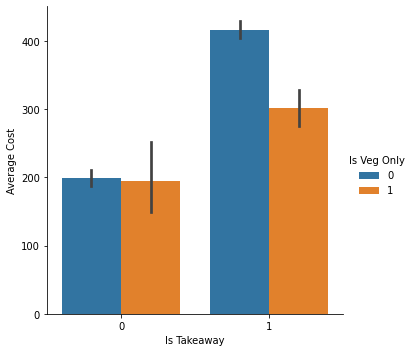

In [100]:
sns.catplot(
    x="Is Takeaway",
    y="Average Cost",
    hue="Is Veg Only",
    data=df,
    kind="bar"
)

<AxesSubplot:>

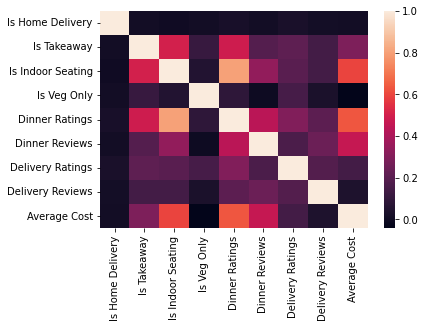

In [101]:
sns.heatmap(data=df.corr())